## Ploting

In [1]:
import algotrade
import ta
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as yf

import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
algotrade.general.getStrategies()

['ABC',
 'ChandelierExitRSI',
 'ExponentialMovingAverage',
 'Ichimoku',
 'MACD',
 'RSI',
 'RSI_MACD',
 'SMA200',
 'Strategy',
 'StrategySimple',
 'WeightedMovingAverage']

In [3]:
TICKER = 'AMD'

In [4]:
df = yf.get_data(ticker=TICKER, start_date='2012-01-01')[:-1]
df = df.round(2)
df

,open,high,low,close,adjclose,volume,ticker
2012-01-03,5.53,5.59,5.44,5.48,5.48,12675100,AMD
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900,AMD
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900,AMD
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600,AMD
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400,AMD
...,...,...,...,...,...,...,...
2022-03-23,114.29,117.55,112.21,113.92,113.92,90579200,AMD
2022-03-24,114.96,120.55,113.71,120.53,120.53,121961300,AMD
2022-03-25,119.92,121.40,117.25,119.67,119.67,95806000,AMD
2022-03-28,117.70,120.41,116.71,120.24,120.24,92966100,AMD



ticker = AMD
start_date = 2012-01-01
strategy = <class 'algotrade.strategies.Ichimoku'>
stats = {'profit_sum': 226.3919515786331, 'profit_mean': 6.8603621690494885, 'profit_median': 0.7462686567164185, 'profit_win': 0.5454545454545454, 'num_trades': 33}
        


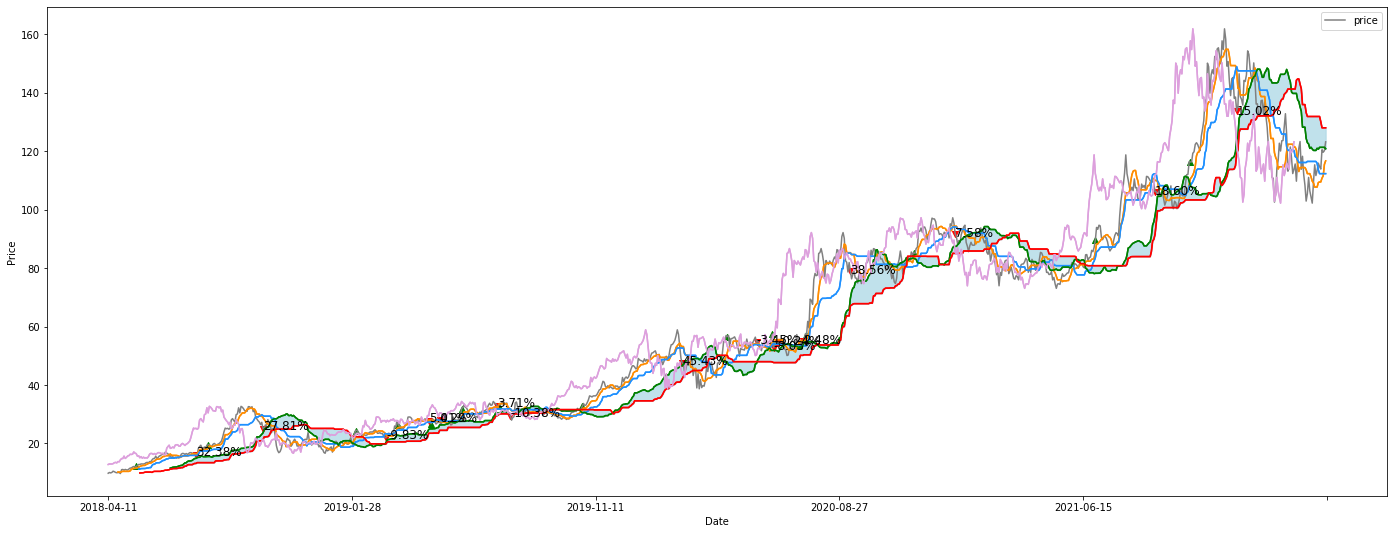

In [5]:
from algotrade.strategies import RSI, RSI_MACD, MACD, Ichimoku

strat = Ichimoku()

test = algotrade.testing.TestStrategy(TICKER, strat, df=df)
print(test)
test.plotBuySell(days=1000, display_strategy=True)

In [6]:
(df.loc[test.sell_dates[-1]].close - df.loc[test.buy_dates[0]].close) / df.loc[test.buy_dates[0]].close * 100

4783.211678832116

In [6]:
test.buy_dates[-1]

Timestamp('2021-03-05 00:00:00')

In [ ]:
test.df.loc[test.df.index > "2021-08-01"].head(20)

In [ ]:
df['close'].plot()

In [ ]:
mas = [3, 9, 18]
for ma in mas:
    df[f'ma{ma}'] = ta.trend.sma_indicator(df.close, window=ma)

In [ ]:
class Graph:
    def __init__(self, cols, df):
        import matplotlib.pyplot as plt
        self.cols = cols
        self.df = df.copy()
        plt.figure(figsize=(24,10))
    
    def plot(self, days=500):
        df = self.df[-days:]
        plt.plot(df.index, df.close, linewidth='2')
        for col in self.cols:
            plt.plot(df.index, df[col], linestyle='--')
        plt.legend(['close']+self.cols)

In [ ]:

cols = ['ma'+str(ma) for ma in mas]
graph = Graph(cols, df).plot(500)


In [ ]:
class Strategies:
    @staticmethod
    def WeightedMovingAverage(df):
        wma9 = ta.trend.wma_indicator(df.close, window=9)
        wma18 = ta.trend.wma_indicator(df.close, window=9)
        buy_signals = (wma9 > wma18)
        sell_signals = (wma9 < wma18)
        return buy_signals.values, sell_signals.values

    def ExponentialMovingAverage(df):
        pass


def getStrategies():
    return [f for f in dir(Strategies) if not f.startswith('_')]

getStrategies()

In [ ]:
import ta

ta.trend.ema_indicator(df.close)

## Testing strategies with different periods

In [ ]:
import algotrade
from algotrade.strategies import WeightedMovingAverage, ExponentialMovingAverage
import pandas as pd

ticker = 'AAPL'
data = algotrade.general.getData(ticker, '2012-01-01')

In [ ]:
class NewStrat(ExponentialMovingAverage):
    def __init__(self, df, periods_short=9, periods_long=18, name='ema'):
        super().__init__(df, periods_short=periods_short, periods_long=periods_long, name=name)

test = algotrade.testing.TestStrategy(ticker, NewStrat, df=data)

print(test.stats)

In [ ]:
test_stats = pd.DataFrame(columns=['period_short', 'period_long']+list(test.stats.keys()))

In [ ]:
for p_short in range(9,27):
    for p_long in range(p_short+1, 54):
        class NewStrat(ExponentialMovingAverage):
            def __init__(self, df, periods_short=p_short, periods_long=p_long, name='ema'):
                super().__init__(df, periods_short=periods_short, periods_long=periods_long, name=name)

        test = algotrade.testing.TestStrategy(ticker, NewStrat, df=data)

        test_stats = test_stats.append({'period_short':p_short, 'period_long':p_long, 'period_dif':p_long-p_short, **test.stats}, ignore_index=True)
test_stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.heatmap(test_stats.corr())

In [ ]:
sns.pairplot(test_stats, kind="reg", plot_kws={'line_kws':{'color':'green'}})

In [ ]:
df_max = pd.DataFrame(columns=list(test_stats.columns))
for col in list(test_stats.columns[2:-1]):
    df_max = df_max.append(test_stats.iloc[test_stats[col].argmax()], ignore_index=True)
df_max

In [ ]:
import algotrade
import ta

In [ ]:
data = algotrade.general.getData('AAPL', '2012-01-01')

In [ ]:
data

In [ ]:
data[["open", "high", 'low', "close"]].max(axis=1)